In [129]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# new_pixel = alpha * pixel1 + beta * pixel2 + gamma

In [160]:
harvey = cv2.imread('C:/Users/charg/OneDrive/Pictures/harv barv.jpg', 1)
harvey = cv2.resize(harvey, (960, 708))
harvey = cv2.cvtColor(harvey, cv2.COLOR_BGR2RGB)
enzo = cv2.imread('C:/Users/charg/OneDrive/Pictures/enzo.jpg', 1)
enzo = cv2.cvtColor(enzo, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('C:/Users/charg/OneDrive/Pictures/copy.PNG', 1)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
print(harvey.shape)
print(enzo.shape)
print(img2.shape) 

(708, 960, 3)
(708, 960, 3)
(616, 648, 3)


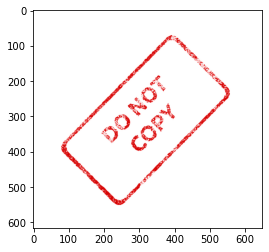

In [161]:
plt.imshow(img2)

In [132]:
blended = cv2.addWeighted(src1=harvey, alpha=0.5, src2=enzo, beta=0.5, gamma=0)  
#The higher the alpha/beta value the more the image will show in the picture

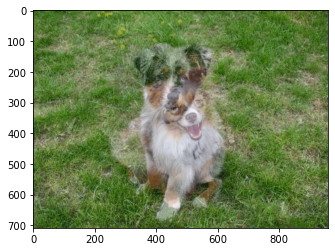

In [133]:
plt.imshow(blended)

### Overlay small image on top of a larger image (no blending)

In [134]:
img2 = cv2.resize(img2, (200, 250))
print(harvey.shape)  #(Y, X, Channels)
print(img2.shape)

(708, 960, 3)
(250, 200, 3)


In [135]:
x_offset = 0
y_offset = 0

In [136]:
x_end = x_offset + img2.shape[1]
y_end = y_offset + img2.shape[0]

In [137]:
harvey[y_offset:y_end, x_offset:x_end] = img2

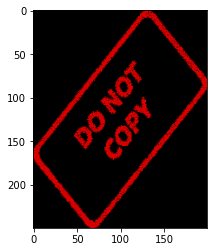

In [138]:
plt.imshow(img2)

### Blend together images of different sizes

In [139]:
x_offset = 960 - 300
y_offset = 250

In [140]:
rows, cols, channels = img2.shape

In [151]:
roi = harvey[0:y_offset, x_offset:960]

In [183]:
roi.shape

(250, 300, 3)

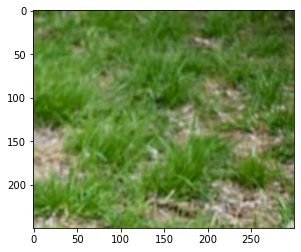

In [152]:
plt.imshow(roi)

In [167]:
img2gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

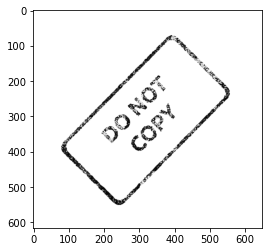

In [168]:
plt.imshow(img2gray, cmap='gray')  #if you have the inverse of this follow the below to update. We pass through white

In [169]:
mask_inv = cv2.bitwise_not(img2gray)

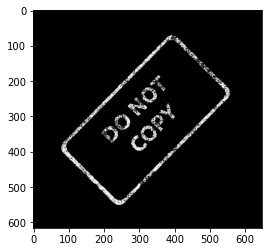

In [170]:
plt.imshow(mask_inv, cmap='gray')

In [171]:
mask_inv.shape     #there is no 3rd channel. We are going to add it. 

(616, 648)

In [176]:
whitebackground = np.full(img2.shape, 255, dtype=np.uint8)   #this creates a white canvas for essentially anything to pass through

In [177]:
bk = cv2.bitwise_or(whitebackground, whitebackgroud, mask=mask_inv)

In [178]:
bk.shape

(616, 648, 3)

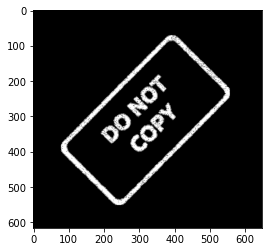

In [179]:
plt.imshow(bk)   #this is the same figure across the 3 color channels

In [180]:
fg = cv2.bitwise_or(img2, img2, mask=mask_inv)

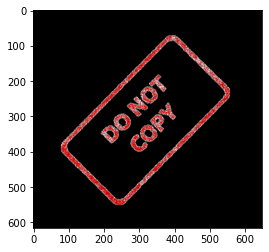

In [181]:
plt.imshow(fg)

In [187]:
fg = cv2.resize(fg, (300, 250))

In [188]:
fg.shape

(250, 300, 3)

In [189]:
final_roi = cv2.bitwise_or(roi, fg)

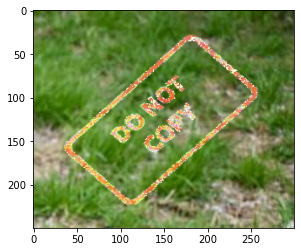

In [190]:
plt.imshow(final_roi)

In [191]:
large_img = harvey
small_img = final_roi

In [192]:
large_img[y_offset:y_offset + small_img.shape[0], x_offset:x_offset+small_img.shape[1]] = small_img

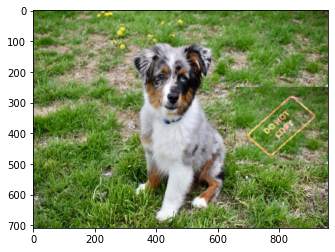

In [193]:
plt.imshow(large_img)